## 簡単な数式と数値シミュレーションの可視化を行う
2次関数、3次関数、sin波、楕円、勾配降下法、ニュートン法

In [1]:
import sys
import numpy as np

In [8]:
import plotly
import plotly.offline as offline
import plotly.graph_objs as go
plotly.offline.init_notebook_mode()

#========================================================================
# Plotlyによる描画
#========================================================================
def viz_plotly(X, Y, vtype='line', name='name', title='title', xaxis='x', yaxis='y', filename='fname', image='png'):
    
    if vtype=='line':
        trace = go.Line( x = X, y = Y, name = name )
    elif vtype=='scatter':
        trace = go.Scatter( x = X, y = Y, name = name )
    
    layout = go.Layout(
        title=title,
    #     legend={"x":0.8, "y":0.1},
        xaxis={'title':xaxis},
        yaxis={'title':yaxis},
        showlegend=True
    #     yaxis2={"title":"Birth Rate", "overlaying":"y", "side":"right"},
    )
    
    data = [trace]
    fig = {'data':data, 'layout':layout}
    offline.iplot(fig, filename=filename, image=image)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


### 2次関数, 3次関数, sin波の微分
sympyを利用

/mnt/c/Git/go/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:372: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




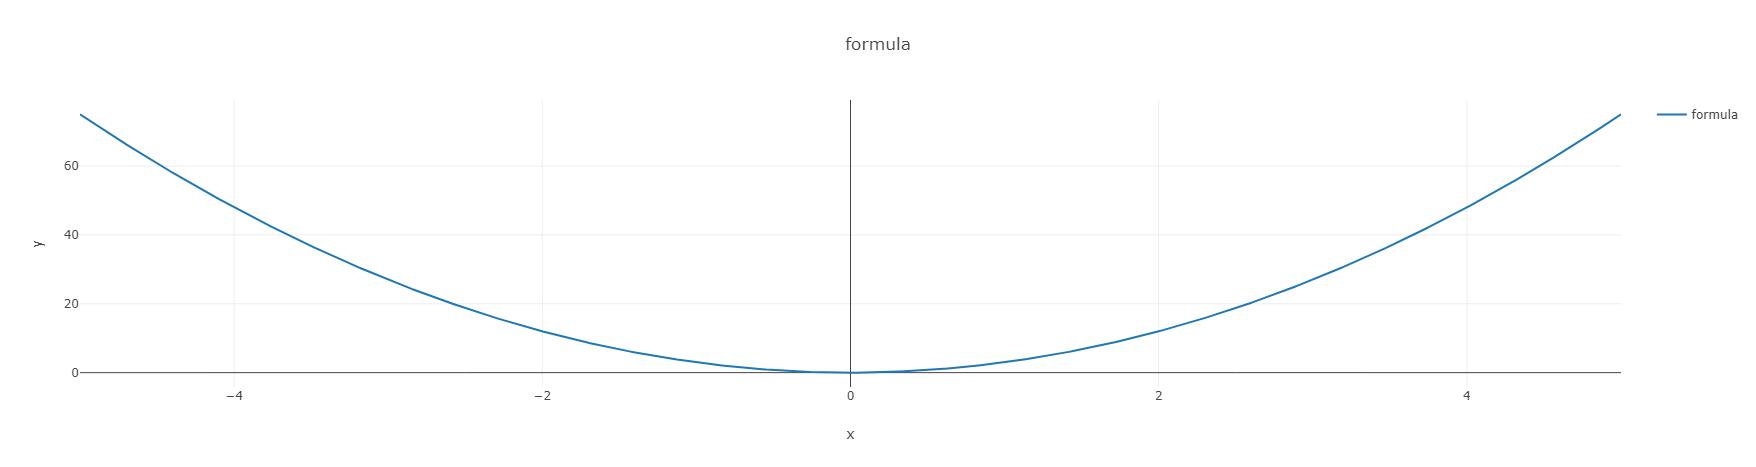

In [5]:
# 変数シンボルの定義
import sympy as sym
(x, y) = sym.symbols('x y')

# 2次関数
def f2():
    return x**2

# 3次関数
def f3():
    return x**3

# sin波
def sin():
    return sym.sin(x)

X = np.linspace(-5, 5, 1000)
Y = np.array([])

# 微分
is_differential = [True, False][0]
for i in X:
    if is_differential:
        Y = np.append(Y, float(sym.diff(f3(), x, 1).subs(x, i)))
    else:
        Y = np.append(Y, float(sin().subs(x, i)))
    
    
#========================================================================
# Plotlyによる描画
#========================================================================
name = 'formula'
title = 'formula'
trace = go.Line(
    x = X,
    y = Y,
    name = name
)

layout = go.Layout(
    title=title,
#     legend={"x":0.8, "y":0.1},
    xaxis={"title":"x"},
    yaxis={"title":"y"},
    showlegend=True
#     yaxis2={"title":"Birth Rate", "overlaying":"y", "side":"right"},
)

data = [trace]
fig = {'data':data, 'layout':layout}
offline.iplot(fig, filename='sin', image="png")

### 楕円の数式を関数で書いて描画
※勾配法などで楕円に対する最適化を行う際、matplotlibのcontourを使わずにplotlyで楕円描画できるようになりたくて試した

/home/ubuntu/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:372: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




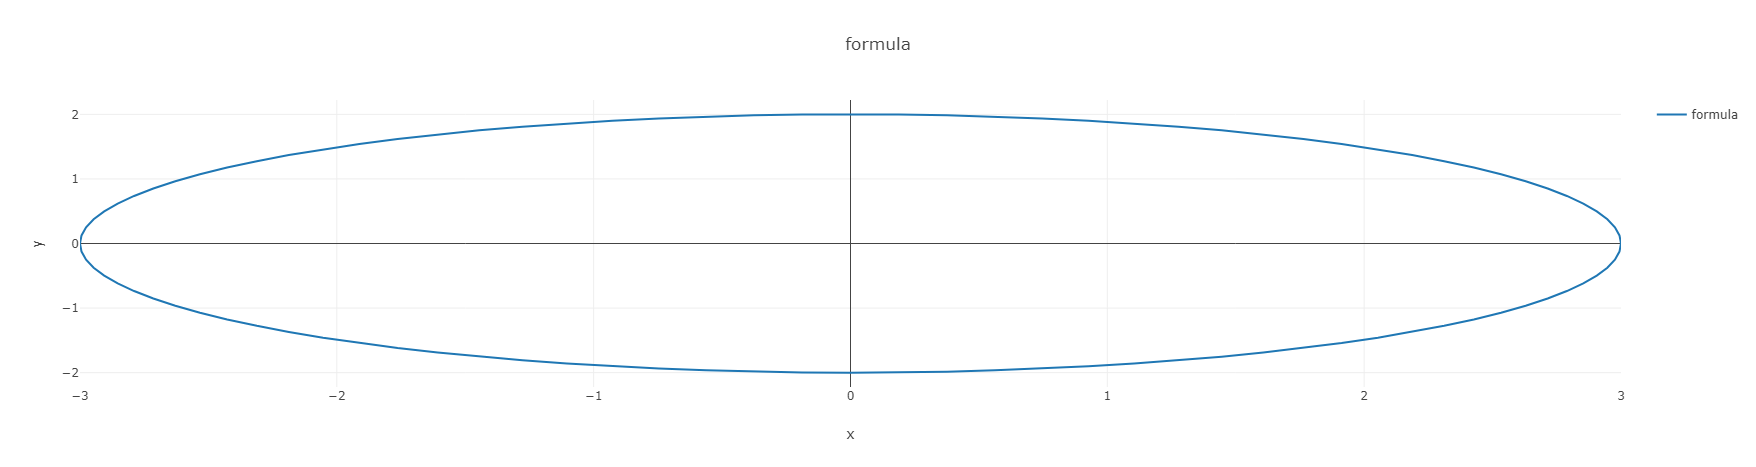

In [81]:
import math

def generateVecFromEllipse(a, b):
  
    t = np.linspace(0, 2 * math.pi, 101) 
    t = np.reshape(t, (t.shape[0], 1))
    
    xVec = np.zeros((t.shape))
    yVec = np.zeros((t.shape))
    for i in range(t.shape[0]):
        xVec[i] = a * math.cos(t[i])
        yVec[i] = b * math.sin(t[i])
    
    data = np.concatenate((xVec, yVec),  axis=1)
    return data
  
# 1. Generating Ellipse Point
dataEl = generateVecFromEllipse(3, 2)

#========================================================================
# Plotlyによる描画
#========================================================================
name = 'formula'
title = 'formula'
trace = go.Line(
    x = dataEl[:, 0],
    y = dataEl[:, 1],
    name = name
)

layout = go.Layout(
    title=title,
#     legend={"x":0.8, "y":0.1},
    xaxis={"title":"x"},
    yaxis={"title":"y"},
    showlegend=True
#     yaxis2={"title":"Birth Rate", "overlaying":"y", "side":"right"},
)

data = [trace]
fig = {'data':data, 'layout':layout}
offline.iplot(fig, filename='sin', image="png")

### sympyで楕円を描画

/home/ubuntu/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:372: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




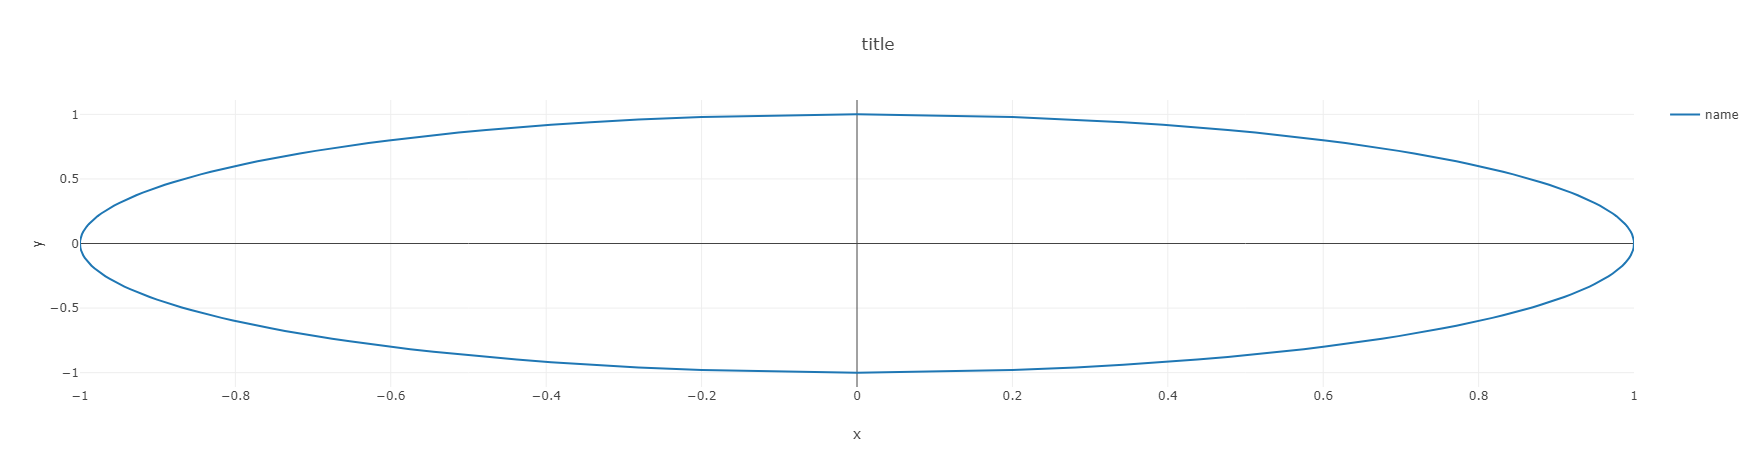

In [37]:
sx_1 = sym.solve(x**2 + y**2 - 1)[0][x]
sx_2 = sym.solve(x**2 + y**2 - 1)[1][x]
Y = np.linspace(-1, 1, 100)
X1 = np.array([])
X2 = np.array([])
for i in Y:
    X1 = np.append(X1, sx_1.subs(y, i))
    X2 = np.append(X2, sx_2.subs(y, i))
X1 = np.asarray(X1, dtype='float32')
X2 = np.asarray(X2, dtype='float32')
    
X_ = np.hstack((X1, X2))
Y_ = np.hstack((Y, Y[::-1]))

viz_plotly(X_, Y_, vtype='line')

### 勾配降下法
制約のない目的関数の値を最小化する

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class GradientDescent:
    def __init__(self, f, df, alpha=0.01, eps=1e-6):
        self.f = f
        self.df = df
        self.alpha = alpha
        self.eps = eps
        self.path = None
        
    def solve(self, init):
        X = init
        path = []
        grad = self.df(X)
        path.append(X)
        # 傾きのノルム二乗値がeps**2より大きい限り探索を続ける
        while (grad**2).sum() > self.eps**2:
            X = X - self.alpha * grad
            grad = self.df(X)
            path.append(X)
        # 通ったルート
        self.path = np.array(path)
        # 最適値
        self.x_ = X
        self.opt_ = self.f(X)
        
import sympy as sym
from sympy import var

(x, y) = sym.symbols('x y')

f = 5*x**2 - 6*x*y + 3*y**2 + 6*x - 6*y

def func(xy):
    X = xy[0]
    Y = xy[1]
    return f.subs([(x, X), (y, Y)])

def dfunc(xy):
    X = xy[0]
    Y = xy[1]
    df_x = f.diff(x, 1)
    df_y = f.diff(y, 1)
    return np.array([df_x.subs([(x, X), (y, Y)]), df_y.subs([(x, X), (y, Y)])])


algo = GradientDescent(func, dfunc)
initial = np.array([1, 1])
algo.solve(initial)
path = algo.path
print(algo.x_)
print(algo.opt_)

[3.45722845826153e-7 1.00000047966483]
-2.99999999999971


### ニュートン法
方程式の解を数値的に求める

In [42]:
def newton1dim(f, df, x0, eps=1e-10, max_iter=1000):
    x = x0
    iter = 0
    path = [x]
    
    while True:
        x_new = x - f(x)/df(x)
        path.append(x_new)
        if abs(x-x_new) < eps:
            break
            
        x = x_new
        iter += 1
        if iter == max_iter:
            break
            
    return x_new, path
            
def f(x):
#     return x**3 - 5*x + 1
    return x**2

def df(x):
    return 2*x

a, path = newton1dim(f, df, 2)
# print(newton1dim(f, df, 0))
# print(newton1dim(f, df, -3))

[2, 1.0, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625, 0.00048828125, 0.000244140625, 0.0001220703125, 6.103515625e-05, 3.0517578125e-05, 1.52587890625e-05, 7.62939453125e-06, 3.814697265625e-06, 1.9073486328125e-06, 9.5367431640625e-07, 4.76837158203125e-07, 2.384185791015625e-07, 1.1920928955078125e-07, 5.960464477539063e-08, 2.9802322387695312e-08, 1.4901161193847656e-08, 7.450580596923828e-09, 3.725290298461914e-09, 1.862645149230957e-09, 9.313225746154785e-10, 4.656612873077393e-10, 2.3283064365386963e-10, 1.1641532182693481e-10, 5.820766091346741e-11]


### 多次元ニュートン法

In [60]:
class Newton:
    def __init__(self, f, df, eps=1e-10, max_iter=1000):
        self.f = f
        self.df = df
        self.eps = eps
        self.max_iter = max_iter
        
    def solve(self, x0):
        x = x0
        iter = 0
        self.path_ = x0.reshape(1, -1)
        while True:
            x_new = x - np.dot(np.linalg.inv(self.df(x)), self.f(x))
            self.path_ = np.r_[self.path_, x_new.reshape(1, -1)]
            if ((x-x_new)**2).sum() < self.eps**2:
                break
                
            x = x_new
            iter +=1
            if iter == self.max_iter:
                break
                
        return x_new

### ニュートン法の描画

[0.92071038 0.39024659]
[-0.92071038 -0.39024659]
[-0.92071038 -0.39024659]


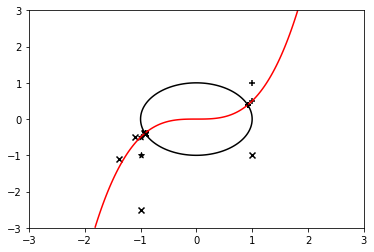

In [77]:
from matplotlib import pyplot as plt

def f1(x, y):
    return x**3 - 2*y

def f2(x, y):
    return x**2 + y**2 - 1

# 関数の行列
def f(xy):
    x = xy[0]
    y = xy[1]
    return np.array([f1(x,y), f2(x,y)])

# ヤコビアン行列
def df(xy):
    x = xy[0]
    y = xy[1]
    return np.array([[3*x**2, -2], [2*x, 2*y]])

xmin, xmax, ymin, ymax = -3, 3, -3, 3
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
x = np.linspace(xmin, xmax, 200)
y = np.linspace(ymin, ymax, 200)
xmesh, ymesh = np.meshgrid(x, y)
z1 = f1(xmesh, ymesh)
z2 = f2(xmesh, ymesh)

# contourは楕円の為のメソッドではなかった。与えられた座標において、対応するインデックスの値がlevelで与えられた値と一致する場合のみ, x,yをプロットする
plt.contour(xmesh, ymesh, z1, colors="r", levels=[0])
plt.contour(xmesh, ymesh, z2, colors="k", levels=[0])
solver = Newton(f, df)

# 3つの始点でニュートン法を実施してみる
initials = [np.array([1,1]),
            np.array([-1, -1]),
            np.array([1, -1])]

markers = ["+", "*", "x"]

# 始点毎にmarkerを変える  
for x0, m in zip(initials, markers):
    sol = solver.solve(x0)
    plt.scatter(solver.path_[:, 0],
                solver.path_[:, 1],
                color="k",
                marker=m
               )
    print(sol)
plt.show()